## Introduction to Data Science

## Scikit-Learn Pipelines

Based in [this](https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/), [this](https://github.com/suvoooo/Machine_Learning/blob/master/pipelineWine.py) and [this](https://towardsdatascience.com/visualizing-support-vector-machine-decision-boundary-69e7591dacea) posts

This tutorial presents two essential concepts in data science and automated learning. One is the machine learning pipeline, and the second is its optimization. These two principles are the key to implementing any successful intelligent system based on machine learning.

+ **Pipelines** are used to chain multiple estimators into one and hence, automate the machine learning process. This is extremely useful as there are often a fixed sequence of steps in processing the data. It can be used to automate a machine learning workflow. The pipeline can involve pre-processing, feature selection, classification/regression, and post-processing. More complex applications may need to fit in other necessary steps within this pipeline. 
    + Some codes are meant to transform features, normalise numericals or turn text into vectors, or fill up missing data, they are transformers. The transform steps must implement fit() and transform().
    + Other codes are meant to predict variables by fitting an algorithm such as a random forest or support vector machine (SVM), they are estimators. The final step, estimator, should implement fit() and predict(). The estimator must implement fit() however, not necessarily implement predict. 
    + So, in a pipeline, we first sequentially apply a list of transformers (data modelling) and then a final estimator (ML model).

In short, pipelines are set up with the fit/transform/predict functionality, so that we can fit the whole pipeline to the training data and transform to the test data without having to do it individually for everything you do.

+ By **Optimization**, we mean tuning the model for the best performance. The success of any learning model rests on the selection of the best parameters that give the best possible results. Optimization can be looked at in terms of a search algorithm, which walks through a space of parameters and hunts down the best out of them.

After completing this tutorial, you should:

+ Appreciate the significance of a pipeline and its optimization.
+ Be able to set up a machine learning pipeline.
+ Be able to optimize the pipeline.
+ Know techniques to analyze the results of optimization.

Kick-start your project with my new book Optimization for Machine Learning, including step-by-step tutorials and the Python source code files for all examples.
The tutorial is simple and easy to follow. It should not take you too long to go through it. So enjoy!

### Tutorial Overview

This tutorial will show you how to

+ Set up a pipeline using the Pipeline object from sklearn.pipeline.
+ Perform a grid search for the best parameters using GridSearchCV() from sklearn.model_selection
+ Analyze the results from the GridSearchCV() and visualize them  

In [1]:
from pandas import read_csv 
from pandas import DataFrame 
from numpy import ravel
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.feature_selection import VarianceThreshold 
from sklearn.pipeline import Pipeline

# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

### The Dataset

We’ll use the Ecoli Dataset from the [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/) to demonstrate all the concepts of this tutorial.  
This dataset is maintained by Kenta Nakai. Let’s first load the Ecoli dataset in a Pandas DataFrame and view the first few rows.

In [2]:
# Read ecoli dataset from the UCI ML Repository and store in dataframe
df = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data', sep = '\s+', header=None)
print(df.head())

            0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp


We’ll ignore the first column, which specifies the sequence name. The last column is the class label. Let’s separate the features from the class label and split the dataset into 2/3 training instances and 1/3 test examples.

In [3]:
# The data matrix X
X = df.iloc[:,1:-1]
# The labels
y = (df.iloc[:,-1:])
 
# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))
 
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=1/3,
                                                    random_state=0)
 
print(X_train.shape)
print(X_test.shape)

(224, 7)
(112, 7)


Great! Now we have 224 samples in the training set and 112 samples in the test set. We have chosen a small dataset so that we can focus on the concepts, rather than the data itself.

For this tutorial, we have chosen the k-nearest neighbor classifier to perform the classification of this dataset.

In [4]:
%%time

knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.9017857142857143
Test set score: 0.8482142857142857
CPU times: user 30.4 ms, sys: 695 µs, total: 31.1 ms
Wall time: 25.5 ms


We should keep in mind that the true judge of a classifier’s performance is the test set score and not the training set score. The test set score reflects the generalization ability of a classifier.
Setting Up a Machine Learning Pipeline

For this tutorial, we’ll set up a very basic pipeline that consists of the following sequence:

+ Scaler: For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().
+ Feature selector: Use VarianceThreshold() for discarding features whose variance is less than a certain defined threshold.
+ Classifier: KNeighborsClassifier(), which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.

In [5]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('selector', VarianceThreshold()),
                 ('classifier', KNeighborsClassifier())
                ])

The pipe object is simple to understand. It says, scale first, select features second and classify in the end. Let’s call fit() method of the pipe object on our training data and get the training and test scores.

In [6]:
%%time

pipe.fit(X_train, y_train)
 
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8794642857142857
Test set score: 0.8392857142857143
CPU times: user 15.9 ms, sys: 0 ns, total: 15.9 ms
Wall time: 19.4 ms


So it looks like the performance of this pipeline is worse than the single classifier performance on raw data. Not only did we add extra processing, but it was all in vain. Don’t despair, the real benefit of the pipeline comes from its tuning. The next section explains how to do that.

### Optimizing and Tuning the Pipeline

In the code below, we’ll show the following:

+ We can search for the best scalers. Instead of just the StandardScaler(), we can try MinMaxScaler(), Normalizer() and MaxAbsScaler().
+ We can search for the best variance threshold to use in the selector, i.e., VarianceThreshold().
* We can search for the best value of k for the KNeighborsClassifier().

The parameters variable below is a dictionary that specifies the key:value pairs. Note the key must be written, with a double underscore __ separating the module name that we selected in the Pipeline() and its parameter. Note the following:

+ The scaler has no double underscore, as we have specified a list of objects there.
+ We would search for the best threshold for the selector, i.e., VarianceThreshold(). Hence we have specified a list of values [0, 0.0001, 0.001, 0.5] to choose from.
+ Different values are specified for the n_neighbors, p and leaf_size parameters of the KNeighborsClassifier().

In [7]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
              'selector__threshold': [0, 0.001, 0.01],
              'classifier__n_neighbors': [1, 3, 5, 7, 10],
              'classifier__p': [1, 2],
              'classifier__leaf_size': [1, 5, 10, 15]}

The pipe along with the above list of parameters are then passed to a GridSearchCV() object, that searches the parameters space for the best set of parameters as shown below:

In [8]:
%%time

grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)
 
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

/home/rsouza/Documents/envs/new_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Training set score: 0.8928571428571429
Test set score: 0.8571428571428571
CPU times: user 6.26 s, sys: 0 ns, total: 6.26 s
Wall time: 6.26 s


By tuning the pipeline, we achieved quite an improvement over a simple classifier and a non-optimized pipeline. It is important to analyze the results of the optimization process.

Don’t worry too much about the warning that you get by running the code above. It is generated because we have very few training samples and the cross-validation object does not have enough samples for a class for one of its folds.
Analyzing the Results

Let’s look at the tuned grid object and gain an understanding of the GridSearchCV() object.

The object is so named because it sets up a multi-dimensional grid, with each corner representing a combination of parameters to try. This defines a parameter space. As an example if we have three values of n_neighbors, i.e., {1,3,5}, two values of leaf_size, i.e., {1,5} and two values of threshold, i.e., {0,0.0001}, then we have a 3D grid with 3x2x2=12 corners. Each corner represents a different combination.

![](https://machinelearningmastery.com/wp-content/uploads/2021/04/GridSearchCV-Computes-a-Score-For-Each-Corner-of-the-Grid.png)

For each corner of the above grid, the GridSearchCV() object computes the mean cross-validation score on the unseen examples and selects the corner/combination of parameters that give the best result. The code below shows how to access the best parameters of the grid and the best pipeline for our task.

In [9]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)

print()

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 7, 'classifier__p': 2, 'scaler': StandardScaler(), 'selector__threshold': 0}

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=7))])


Another useful technique for analyzing the results is to construct a DataFrame from the grid.cv_results_. Let’s view the columns of this data frame.

In [10]:
result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


This DataFrame is very valuable as it shows us the scores for different parameters. The column with the mean_test_score is the average of the scores on the test set for all the folds during cross-validation.
The DataFrame may be too big to visualize manually, hence, it is always a good idea to plot the results. Let’s see how n_neighbors affect the performance for different scalers and for different values of p.

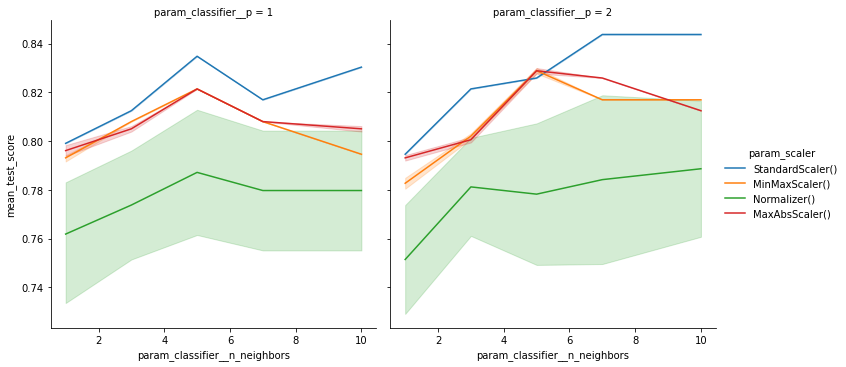

In [11]:
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__p')
plt.show()

The plots clearly show that using StandardScaler(), with n_neighbors=7 and p=2, gives the best result. 

Let’s make one more set of plots with leaf_size.

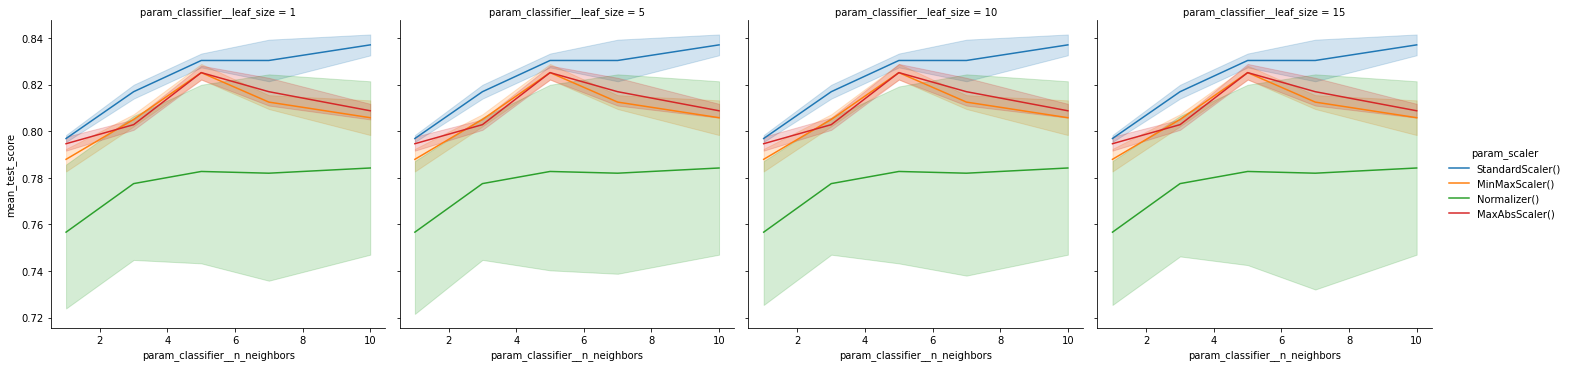

In [12]:
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()

### Summary

In this tutorial we learned the following:

+ How to build a machine learning pipeline.
+ How to optimize the pipeline using GridSearchCV.
+ How to analyze and compare the results attained by using different sets of parameters.

The dataset used for this tutorial is quite small with a few example points but still the results are better than a simple classifier.